# DS-SF-27 | Unit Project 2: Exploratory Data Analysis

In this project, you will implement the exploratory analysis plan developed in Unit Project 1.  This will lay the groundwork for our our first modeling exercise in Unit Project 3.

First, load the python libraries you will need for this project:

In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
pd.set_option('display.notebook_repr_html', True)

%matplotlib inline
plt.style.use('ggplot')

Then, read in your dataset:

In [6]:
df = pd.read_csv(os.path.join('..', '..', 'dataset', 'ucla-admissions.csv'))

df.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


## Questions

> ### Question 1.  How many observations are in our dataset?

In [7]:
df.shape

(400, 4)

In [8]:
len(df)

400

Answer: There are 400 observations in the dataset.

> ### Question 2.  Create a summary table.

In [9]:
# TODO
df.describe()

/Users/RenaChiu/anaconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN
max,1.000000,800.000000,4.00000,4.000000


> ### Question 3.  Why would `gre` have a larger variance than `gpa`?

In [24]:
df.gre.var()

13369.953039758006

In [25]:
df.gpa.var()

0.14487948622204228

Answer: GPA only has values (1,2,3,4), whereas GRE values have a much greater range.

> ### Question 4.  Drop data points with missing data.

In [13]:
df.isnull().sum()

admit       0
gre         0
gpa         0
prestige    0
dtype: int64

In [ ]:
#note to dan, not sure what happened here. But I saved the wrong version of this notebook. 
#I used this formula to drop the missing data. df.dropna(axis = 'index', subset = ['gre', 'gpa', 'prestige'], inplace=True)

> ### Question 5.  Confirm that you dropped the correct data.  How can you tell?

In [24]:
# TODO
df.isnull().sum()

admit       0
gre         0
gpa         0
prestige    0
dtype: int64

Answer: I dropped the correct data because there are no more null values in the data set.

> ### Question 6.  Create boxplots for `gre` and `gpa`.

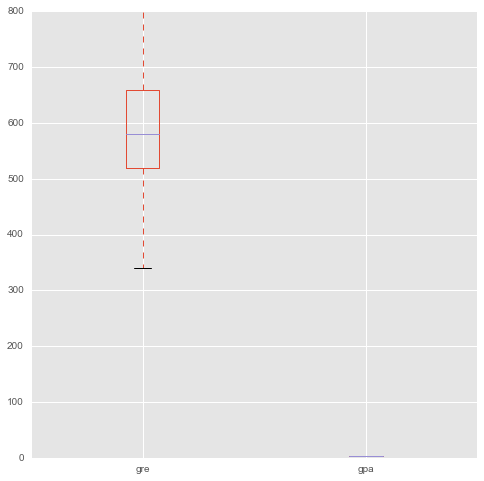

In [33]:
# Looks like I better separate out the box plots
df[['gre', 'gpa']].plot(kind = 'box', figsize = (8,8))

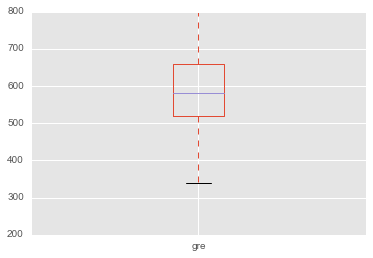

In [14]:
# TODO
df.gre.plot(kind = 'box')

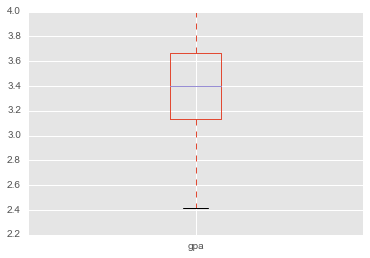

In [15]:
df.gpa.plot(kind = 'box')

> ### Question 7.  What do boxplots show?

Answer: Boxplots shows how data is distributed. These boxplots show that re and gpa are symmetrically distributed with no outliers.

> ### Question 8.  Plot the distribution of each variable.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11e5bc310>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11eef4cd0>]], dtype=object)

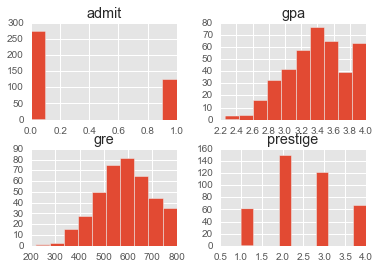

In [14]:
df.hist()

> ### Question 9.  If our model had an assumption of a normal distribution for `gre` and `gpa`, would we meet that requirement?  Would their distributions need correction?  If so, why, why not?  How?

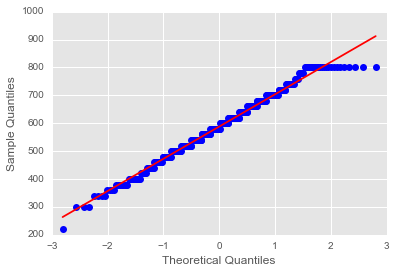

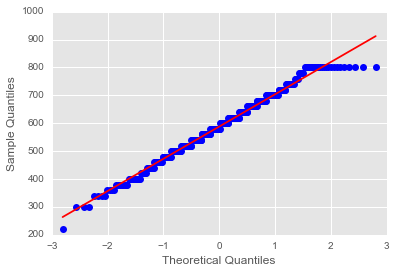

In [18]:
# Gotta do a q-q plot
sm.qqplot(df.gre, line = 's')

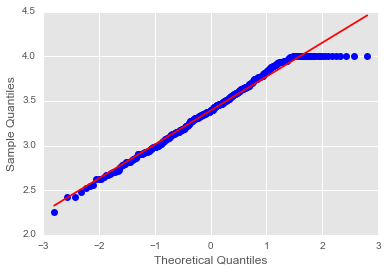

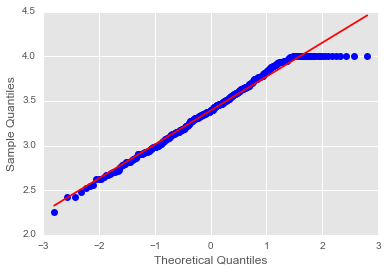

In [19]:
sm.qqplot(df.gpa, line = 's')

Answer: Both look like are somewhat normally distribed, but a little skewed to the left. It passes the test. Therefore, no correction is needed. 

In [20]:
model = smf.ols(formula = 'gre ~ gpa', data = df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gre   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     67.66
Date:                Sat, 08 Oct 2016   Prob (F-statistic):           2.84e-15
Time:                        15:00:12   Log-Likelihood:                -2417.6
No. Observations:                 397   AIC:                             4839.
Df Residuals:                     395   BIC:                             4847.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    193.0449     48.299      3.997      0.000        98.089   288.001
gpa          116.3873     14.150      8.225      0.000        88.569   144.206
==============================================================================
Omnibus:                        1.159   Durbin-Watson:                   1.910
Prob(Omnibus):                  0.560   Jarque-Bera (JB):                1.172
Skew:                          -0.045   Prob(JB):                        0.557
Kurtosis:                       2.749   Cond. No.                         33.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> ### Question 10.  Create a correlation matrix for the dataset

In [10]:
df.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.182919,0.175952,-0.241355
gre,0.182919,1.000000,0.382408,-0.124533
gpa,0.175952,0.382408,1.000000,-0.059031
prestige,-0.241355,-0.124533,-0.059031,1.000000


> ### Question 11.  What did you find?  Which of our variables are potentially colinear?

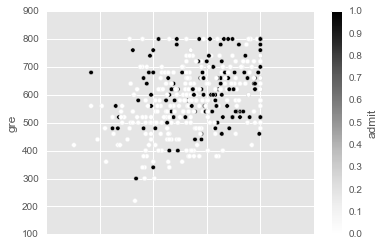

In [21]:
df.plot(kind = 'scatter', x = 'gpa', y = 'gre', c = 'admit')

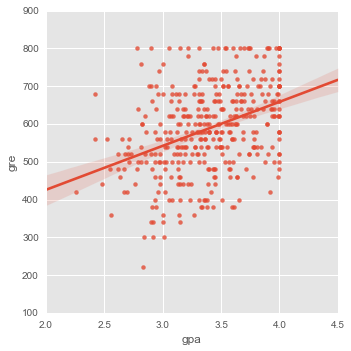

In [17]:
sns.lmplot(x = 'gpa', y = 'gre', data = df)

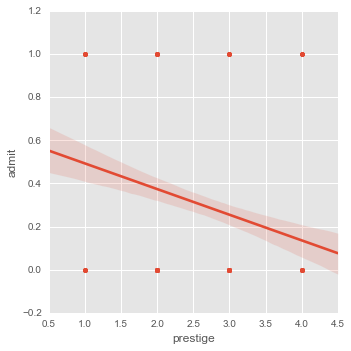

In [23]:
sns.lmplot(x = 'prestige', y = 'admit', data = df)

Answer: It looks like gre and gpa are potentially collinear but there's a weak correlation - 0.382408. 

> ### Question 12.  Write an analysis plan for exploring the association between graduate school admission rates and prestige of undergraduate schools.

In [27]:
a = df[df.admit == 1]
b = df[df.admit == 0]

In [23]:
a

,admit,gre,gpa,prestige
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
5,1,760.0,3.00,2.0
6,1,560.0,2.98,1.0
...,...,...,...,...
390,1,800.0,3.05,2.0
391,1,660.0,3.88,2.0
392,1,600.0,3.38,3.0
393,1,620.0,3.75,2.0


In [28]:
b

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
4,0,520.0,2.93,4.0
7,0,400.0,3.08,2.0
9,0,700.0,3.92,2.0
10,0,800.0,4.00,4.0
...,...,...,...,...
395,0,620.0,4.00,2.0
396,0,560.0,3.04,3.0
397,0,460.0,2.63,2.0
398,0,700.0,3.65,2.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11e00be50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11e2d30d0>]], dtype=object)

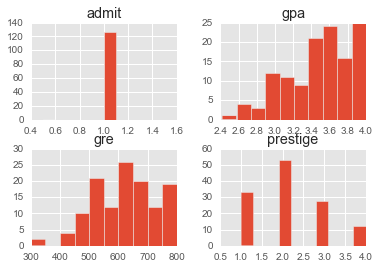

In [25]:
a.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11eae1790>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11ecb8650>]], dtype=object)

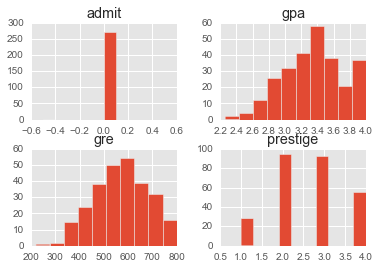

In [35]:
b.hist()

Answer: First, do a correlation matrix to find potential correlation between admit and prestige. Then I would like to subset the dataframe for the group of students that are admitted and compare that with the group of students that were not admitted. It would be difficult to do a scatter plot because of the binary nature of 'admit'. 

> ### Question 13.  What is your hypothesis?

Answer: There's a positive relationship between admit and prestige